<a href="https://colab.research.google.com/github/Kartavya-Jharwal/Kartavya_Business_Analytics2025/blob/main/Class_Assignments/week11/Week_11_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scenario, Hypothesis and Test**

A distributor of frozen dessert pies wants to evaluate factors thought to influence demand.

Pie Sales (units per week)

Advertising ($100)

Null Hypothesis (H₀): β₁ = β₂ = 0

Alternative Hypothesis (H₁): At least one βᵢ ≠ 0

Significance level of 0.05 (CI of 95%)

Test: F test (model) and t test (Independent variables)

Sample size: 15 weeks

In [ ]:
# Import libraries for multiple regression analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [ ]:
# Load dataset
df = pd.read_excel('Pie Sale.xlsx')
df.info()
df.head()

Data loaded successfully!
(15, 4)


In [ ]:
# Run a correlation matrix and a heat map
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Columns in dataset: ['Week', 'Pie Sales', 'Price ($)', 'Advertising ($100s)']

Dependent Variable: Advertising ($100s)
Independent Variables: ['Week', 'Pie Sales', 'Price ($)']


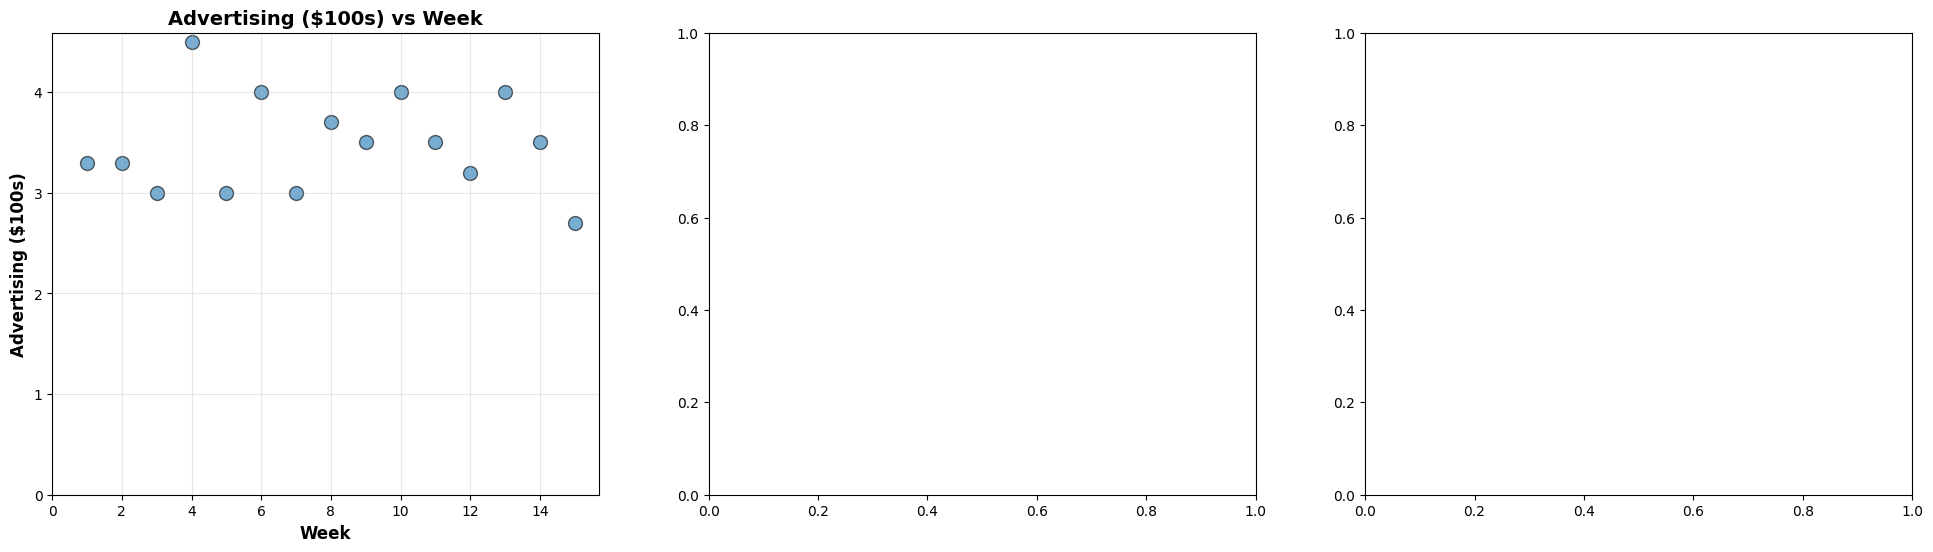

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 5))

# Scatter plot for Price ($) vs Pie Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='Price ($)', y='Pie Sales', data=df)
plt.title('Pie Sales vs Price ($)')
plt.xlabel('Price ($)')
plt.ylabel('Pie Sales')
plt.xlim(0)
plt.ylim(0)

# Scatter plot for Advertising ($100s) vs Pie Sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='Advertising ($100s)', y='Pie Sales', data=df)
plt.title('Pie Sales vs Advertising ($100s)')
plt.xlabel('Advertising ($100s)')
plt.ylabel('Pie Sales')
plt.xlim(0)
plt.ylim(0)

plt.tight_layout()
plt.show()

In [ ]:
# Check for multicollinearity (Variance Inflation Factor)
# Define independent variables (features)
X = df[['Price ($)', 'Advertising ($100s)']]

# Add a constant to the independent variables
X_constant = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['feature'] = X_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_constant.values, i)
                   for i in range(X_constant.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

In [ ]:
# Build regression model
model = sm.ols("Q('Pie Sales') ~ Q('Price ($)') + Q('Advertising ($100s)')", data=df).fit()
print(model.summary())

In [ ]:
# Plot residuals vs fitted and vs each independent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Residuals vs Fitted Values
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

# Plot 2: Residuals vs Price ($)
sns.scatterplot(x=df['Price ($)'], y=model.resid, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Price ($)')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Residuals')

# Plot 3: Residuals vs Advertising ($100s)
sns.scatterplot(x=df['Advertising ($100s)'], y=model.resid, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title('Residuals vs Advertising ($100s)')
axes[2].set_xlabel('Advertising ($100s)')
axes[2].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Predict sales for a price $5.5 and advertising $3.5
# Define the new input values for prediction
new_data = pd.DataFrame({
    'Price ($)': [5.5],
    'Advertising ($100s)': [3.5]
})

# Get predictions and confidence intervals
predictions_summary = model.get_prediction(new_data).summary_frame(alpha=0.05)

# Display the predicted sales and confidence intervals
predicted_sales = predictions_summary['mean'][0]
mean_ci_lower = predictions_summary['mean_ci_lower'][0]
mean_ci_upper = predictions_summary['mean_ci_upper'][0]
obs_ci_lower = predictions_summary['obs_ci_lower'][0]
obs_ci_upper = predictions_summary['obs_ci_upper'][0]

print(f"Predicted Pie Sales for Price $5.5 and Advertising $3.5 (x100): {predicted_sales:.2f} units")
print(f"Mean Confidence Interval (95%): ({mean_ci_lower:.2f}, {mean_ci_upper:.2f})")
print(f"Observed (Prediction) Confidence Interval (95%): ({obs_ci_lower:.2f}, {obs_ci_upper:.2f})")

In [ ]:
# Check for normality
# Get the residuals from the model
residuals = model.resid

# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk Test P-value: {shapiro_test.pvalue:.3f}")

# Interpretation of Shapiro-Wilk test
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print(f"Since p-value ({shapiro_test.pvalue:.3f}) > alpha ({alpha}), we do not reject the null hypothesis. The residuals appear to be normally distributed.")
else:
    print(f"Since p-value ({shapiro_test.pvalue:.3f}) <= alpha ({alpha}), we reject the null hypothesis. The residuals do not appear to be normally distributed.")

# Create a Q-Q plot to visually check for normality
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()